## Antes de Começar

- Opcional: Leia e faça os exercícios sobre Python [aqui](Básico%20-%20Python.ipynb);
- Instale o pandas. Usando pip, pode-se fazer este comando: `pip3 install pandas matplotlib numpy` (em alguns Sistemas Operacionais/configurações, você usará `pip` ao inves de `pip3`) 




### O que você precisa saber?

**Pandas:** Entenda o funcionamento da biblioteca Pandas [aqui](Básico%20-%20Pandas.ipynb). Nesta prática você vai precisar entender como filtrar os dados e o uso do [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) além de como criar um Dataframe.


**Aulas introdutórias:** Veja [a video aula 1](https://www.youtube.com/watch?v=fasqKSx2-TE&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=2&t=2s) completa e, além disso [a explicação sobre ganho de informação neste video](https://www.youtube.com/watch?v=8nV6lICu-l8&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=8). [Slides mais detalhado do calculo pode ser visto aqui](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing).


### Termos importantes:

**Entrada**: Representada por um vetor em que cada posição possui um indicador que auxilia na predição da tarefa em questão. Por exemplo, para prevermos se um email é spam ou não, um indicador poderia ser a quantidade de erros ortográficos.  Cada item da entrada é geralmente chamado de **atributo** - também pode ser chamado de **indicador**, **característica** ou, do inglês, **_features_**

**Classe alvo (em inglês, _target class_**): é o valor que queremos prever representado por dois ou mais *rótulos* (sim ou não são dois rótulos, por exemplo).  Também chamado de **ground truth**.

## Implementação do Ganho de Informação

Implemente o código no arquivo `ganho_informacao.py` de acordo com as instruções comentadas. Faça na ordem das funçoes que estiverem lá. Para cada função implementada, rode o teste unitário para verificar se a mesma está funcionando (veja na próxima seção). Os [slides de ganho de informação](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing) poderão ajudar.

Caso queira, você também pode usar esse notebook para testar. Para isso, comente a importação do módulo `ganho_informacao` e copie a função aqui no notebook para testà-la e, quando tiver funcionando, copie e cole ela de volta no arquivo `ganho_informação.py`;

**Atenção:** após rodar o comando de import neste notebook, caso precise mudar algo no código `ganho_informacao.py` e visualizar o resultado aqui, você deverá reiniciar o kernel (kernel -> restart).

O teste unitário é feito executando o arquivo `tests.py` explicitando, opcionalmente, a classe/método que desejamos executar. Logo após implementar uma função, teste-o usando o teste unitário correspondente. Para isso, pressione `ctrl+enter` na célula com o comando de teste abaixo para executá-lo. Se o Python 3 do seu computador for executado como `python` você deverá alterar os comandos abaixo apropriadamente.

**Teste 1 - função `entropia`:**

In [1]:
!python3 -m tests TestInfoGain.test_entropy

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


**Teste 2 - função `ganho_informacao_condicional`:**

In [2]:
!python3 -m tests TestInfoGain.teste_ganho_informacao_condicional

.
----------------------------------------------------------------------
Ran 1 test in 0.021s

OK


**Teste 3 - função `ganho_informacao`:**

In [3]:
!python3 -m tests TestInfoGain.test_info_gain

.
----------------------------------------------------------------------
Ran 1 test in 0.023s

OK


Importação das bibliotecas necessárias. Sempre que quiser acessar alguma função/classe do pandas use, por exemplo: pd.DataFrame()

In [4]:
import numpy as np
import pandas as pd
from ganho_informacao import entropia,ganho_informacao

Como, no código acima, chamamos o módulo pandas de "pd", então, temos que referencia-lo sempre que quisermos intanciar uma classe/chamar uma função deste módulo. Exemplo:

In [5]:
pd.DataFrame({"col1":["a","b","c"]})

,col1
0,a
1,b
2,c


Faça um DataFrame do exemplo [nos slides sobre Ganho de Informação (sobre a renda e o crédito aprovado)](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing). Logo após, calcule a entropia e o ganho de informação do atributo Renda. Confira os resultados com os slides.

In [9]:
## Seu código aqui - Criação do DataFrame 
import math

teste= pd.DataFrame({"Renda": ["Alta","Alta","Alta","Baixa","Alta","Baixa","Baixa","Baixa"],"Credito aprovado":["Sim","Sim","Sim","Não","Não","Não","Não","Não"],})

col=teste.columns
print(teste)

valores_obtidos = ganho_informacao(teste, "Credito aprovado", "Renda")
print(f"\nGanho de Informação: {valores_obtidos}\n")


   Renda Credito aprovado
0   Alta              Sim
1   Alta              Sim
2   Alta              Sim
3  Baixa              Não
4   Alta              Não
5  Baixa              Não
6  Baixa              Não
7  Baixa              Não

Ganho de Informação: 0.5449999999999999



In [8]:
## Seu código aqui - Calculo da Entropia do atributo Renda
import pandas as pd
import math

def entropia(df_dados:pd.DataFrame, nom_col_classe:str) -> float:
    """
        Calcula a entropia de acordo com df_dados (DataFrame) e a classe. Use a função math.log com
        o log na base 2. Não esqueça de importar o módulo math.

        df_dados: Dados a serem considerados para o calculo da entropia
        nom_col_classe: nome da coluna (em df_dados) que representa a classe
    """
    #substitua os None/0 quando necessario para completar o código
    df_dados.replace({"None":0})
    #ser_count_col armazena, para cada valor da classe (coluna), a sua quantidade
    ser_count_col = df_dados[nom_col_classe].value_counts()
    num_total = len(df_dados) #pega o num de linhas
    entropia = 0

    #Navege em ser_count_col para fazer o calculo da entropia
    for val_atr,count_atr in ser_count_col.iteritems():
        #altere os valores de val_prob e entropia para o calculo correto da mesma
        #val_prob deverá ser a proporção de instancias de uma determinada classe
        #caso tenha duvida sobre o iteritems e value_counts, consulte o passo a passo do pandas
        
        val_prob = (count_atr*1)/num_total
        entropia += (-val_prob*math.log(val_prob,2))
    return round(entropia,4)

In [7]:
## Seu código aqui - Calculo do InfoGain
import pandas as pd

def ganho_informacao_condicional(df_dados: pd.DataFrame, val_entropia_y:float, nom_col_classe:str, nom_atributo:str, val_atributo:float) ->float:
    """
    Calcula o GI(Y|nom_atributo=val_atributo), ou seja,
    calcula o ganho de informação do atributo 'nom_atributo' quando ele assume o valor 'val_atributo'.
    O valor de Entropia(Y) já foi calculado e está armazenado em val_entropia_y.
    Dica: A entropia condicional pode ser calculada filtrando o DataFrame df_dados.

    df_dados: Dataframe com os dados a serem analisados.
    val_entropia_y: Entropia(Y) (ver slides)
    nom_col_classe: nome da coluna que representa a classe
    nom_atributo: atributo a ser calculado o ganho de informação
    val_atributo: valor do atributo a ser considerado para este calculo
    """
    #substitua os "None"/0 quando necessario para completar o código
    df_dados.replace({"None":0})
    #.em df_dados_filtrado, filtre o df_dados da forma correta - pensando quais
    #elementos considerar na entropia condicional Entropia(Y|nom_atributo=val_atributo).
    df_dados_filtrado = df_dados[df_dados[nom_atributo]==val_atributo]

    #use df_dados_filtrado para obter o valor de Entropia(Y|nom_atributo=val_atributo)
    val_ent_condicional = entropia(df_dados_filtrado, nom_col_classe)
    
    #use val_ent_condicional para calcular o GI(Y|nom_atributo=val_atributo)
    val_gi = round(val_entropia_y - val_ent_condicional,2)

    #para testes:
    #print("GI({classe}| {atr}={val}) = {val_gi}".format(classe=nom_col_classe,atr=nom_atributo,val=val_atributo,val_gi=val_gi))

    return val_gi


def ganho_informacao(df_dados:pd.DataFrame, nom_col_classe:str, nom_atributo:str) -> float:
    """
        Calcula GI(Y| nom_atributo), ou seja, o ganho de informação do atributo nom_atributo.

        df_dados: DataFrame com os dados a serem analisados.
        nom_col_classe: nome da coluna que representa a classe
        nom_atributo: atributo a ser calculado o ganho de informação
        val_atributo: valor do atributo a ser considerado para este calculo
    """
    #Muito similar ao codigo da entropia, mas aqui você deverá navegar sobre
    #os possiveis valores do atributo nom_atributo para calcular o infoGain
    #(usando a função ganho_informacao_condicional)
    #substitua os "None"/0 quando necessario para completar o código
    df_dados.replace(to_replace="None", value=0.0, inplace=True)
    
    #atenção nessa linha abaixo, qual é o valor que temos que colocar em None?
    #o que precisamos contabilizar dessa vez?
    ser_count_col = df_dados[nom_atributo].value_counts() # pega todos os possiveis valores na coluna e suas qtd

    val_entropia_y = entropia(df_dados, nom_col_classe) 

    num_total = len(df_dados)
    val_info_gain = 0

    for val_atr,count_atr in ser_count_col.iteritems():
        val_prob = (count_atr*1)/ num_total
        val_info_gain += val_prob * ganho_informacao_condicional(df_dados, val_entropia_y, nom_col_classe, nom_atributo, val_atr)

        #print("GI("+nom_col_classe+"| "+nom_atributo+"="+val_atr+") = "+str(val_info_gain))

    return val_info_gain

## Análise de Atributos para Diferenciar Espécies de [Plantas do Gênero Iris](https://en.wikipedia.org/wiki/Iris_(plant))

<img src="imgs/partes_flor.png" alt="Partes de uma flor">

Plantas do gênero Iris possuem diversas espécies que podem ser diferenciadas por algumas caracteristicas da flor.  Nesta prática, iremos investigar quais atributos distinguem melhor algumas espécies dessa planta. Para isso, usaremos [este dataset](iris.csv) que possui 150 plantas do gênero Iris com atributos de sua flor (propriedades): 

- Tamanho e largura do sépala (em cm)

- Tamanho e largura da pétala (em cm)

Existem 3 espécies de plantas do genero Iris na base que será usada: [Iris Setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris Virginifica](https://en.wikipedia.org/wiki/Iris_virginica) e [Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)

Nesta atividade, você deverá:

1. Calcular do InfoGain de cada atributo. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene de forma decrescente pelo valor do InfoGain .

1. Gerar um gráfico de disperção (*scatter plot*) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente.

Iniciamente, leia o CSV e armazene-o em um DataFrame por meio do [método read_csv do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [10]:
# Leia o CSV e armazene-o em um DataFrame - use a função read_csv do pandas
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from ganho_informacao import *

tabela = pd.DataFrame({'Atributo' : [],'InfoGain' : [] })
tabela_aux = pd.DataFrame()

pd.DataFrame = pd.read_csv('iris.csv')
iris=pd.DataFrame
#print(iris)
iris=iris[["Species", "Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]]
col=iris.columns

Agora, por meio das funções que você implementou, calcule o InfoGain de cada atributo. O DataFrame possui um atributo `columns` que pode ajudar. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene essa tabela pelo InfoGain, [use o método sort_values do DataFrame](https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values). Para criação do novo DataFrame com o infogain, você pode criar uma matriz e depois adiciona-la em um DataFrame novo.

In [11]:
i:int = 0
for coluna, item in iris.iteritems():
    if coluna != col[0]:
        valores_obtidos = ganho_informacao(pd.DataFrame, col[0], coluna)
        tabela.loc[i] = [coluna, valores_obtidos]  # adiciona uma linha
        i=i+1
    
dfordenado = tabela.sort_values(by='InfoGain')

df1=dfordenado[dfordenado.index>-1]
print(df1)

       Atributo  InfoGain
1   Sepal Width  0.510870
0  Sepal Length  0.876938
3   Petal Width  1.435898
2  Petal Length  1.446317


Gere um gráfico de disperção (scatter plot) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente. [Veja o Jupyter do Pandas, se necessário](Básico%20-%20Pandas.ipynb). 

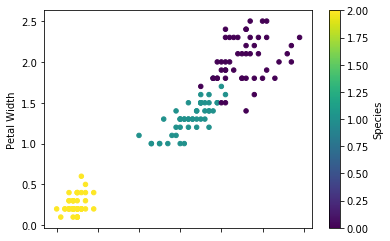

In [12]:
# Crie o gráfico solicitado
pd.options.mode.chained_assignment = None  # default='warn'
tam: int = len(df1) # pega tam do dataframe para acessar as duas ultimas posicoes

eixo_x = df1.iloc[tam-1].values # maior
eixo_y = df1.iloc[tam-2].values # quase maior


#seleciona apenas as colunas de interesse
for i, item in iris.iteritems():
    if (i != col[0]) and (i!=eixo_x[0]) and (i!=eixo_y[0]):
        iris.drop([i], axis=1, inplace=True)

# vamos montar o grafico
#tabela_aux.replace({"None":0})
iris.replace(to_replace="None", value=0.0, inplace=True)

ser_count_col=iris[col[0]].value_counts()

j:int=0
for i, qt in ser_count_col.iteritems():
    iris.replace(to_replace=(i), value=j, inplace=True)
    j=j+1
#print(tabela_aux)

iris.plot.scatter(x='Petal Length',y ='Petal Width',c='Species', colormap='viridis')

plt.show()

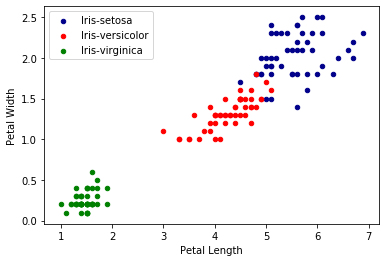

In [13]:
#filtra os contatos por cidade (para fazer grupos)
iris0 = iris[iris['Species']==0]
iris1 = iris[iris['Species']==1]
iris2 = iris[iris['Species']==2]
#Cria o plot com os dois grupos
plot_gp1 = iris0.plot.scatter(x='Petal Length', y='Petal Width', color='DarkBlue', label='Iris-setosa')
iris1.plot.scatter(x='Petal Length', y='Petal Width', color='Red', label='Iris-versicolor',ax=plot_gp1)
iris2.plot.scatter(x='Petal Length', y='Petal Width', color='Green', label='Iris-virginica',ax=plot_gp1)

## Opcional: discretização dos atributos numéricos

Nesta versão de InfoGain, não discretizamos quando o valor é numérico. Porém, o correto seria discretizarmos cada atributo numérico. Caso queira, discretize, para isso: 

- Você deverá discretizar apenas atributos numéricos. Use a função is_numeric_dtype do módulo pandas.api.types (não esqueça de importar esse módulo)

- Altere o parametro 'bin' de value_counts na função ganho_informacao. [Veja a documentação](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.value_counts.html); 

- Você deverá alterar a forma que será filtrado os valores do ganho de informação. Para o filtro, use operadores logicos bitwise e verifique como funciona o objeto [Inteval](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Interval.html)

Após discretizar, reinicie o kernel e verifique o resultado da análise novamente.

Muitas vezes, depois da discritização o resultado de infogain pode mudar, nem sempre para um valor mais alto. Isso se deve a forma que ele é discretizado. Dependendo da forma, podemos perder informação. Fazer a discretização de uma forma que a divisão forneça o maior ganho de informação possível pode ser uma boa alternativa.

## Informações sobre da Base de Dados (retirada do [Weka](https://www.cs.waikato.ac.nz/ml/weka/))

1. Title: Iris Plants Database
 
2. Sources:
      - (a) Creator: R.A. Fisher
      - (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
      - (c) Date: July, 1988

3. Past Usage:
    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
       to Mathematical Statistics" (John Wiley, NY, 1950).
    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
       Structure and Classification Rule for Recognition in Partially Exposed
       Environments".  IEEE Transactions on Pattern Analysis and Machine
       Intelligence, Vol. PAMI-2, No. 1, 67-71.
    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
       Transactions on Information Theory, May 1972, 431-433.
    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
       conceptual clustering system finds 3 classes in the data.
 
4. Relevant Information:
        This is perhaps the best known database to be found in the pattern
        recognition literature.  Fisher's paper is a classic in the field
        and is referenced frequently to this day.  (See Duda & Hart, for
        example.)  The data set contains 3 classes of 50 instances each,
        where each class refers to a type of iris plant.  One class is
        linearly separable from the other 2; the latter are NOT linearly
        separable from each other.